# Introduction

Prueba de PyBoolNet.

Installation instructtions and manual [here.](https://pyboolnet.readthedocs.io/en/master/installation.html)

## Install library

In [ ]:
!pip3 install networkx
!pip3 install git+https://github.com/hklarner/pyboolnet

In [65]:
import pyboolnet
from pyboolnet import file_exchange # load and write the network to file
from pyboolnet import interaction_graphs as ig # create the networkx graph
import networkx as nx
import matplotlib.pyplot as plt
from pyboolnet import state_transition_graphs as STGs
from pyboolnet import attractors as AD # To detect attractors

In Python we represent prime implicants as nested dictionaries and lists. The prime implicants of a network with three components v1, v2, v3 and three update functions f1, f2, f3 that are defined by:

In [ ]:
bnet = """
  v1,   v2 & (!v1 | v3)
  v2,   !v3
  v3,   v2 | v1
  """

In [ ]:
primes = file_exchange.bnet2primes(bnet)

save primes as a bnet file. To do so use primes2bnet:

In [ ]:
file_exchange.primes2bnet(primes, "example01.bnet")

'v1,   v2 & v3 | !v1 & v2\nv2,   !v3\nv3,   v2 | v1\n'

# Examine the graph

In [ ]:

#bnet = "\n".join(["v1, v1|v3","v2, 1", "v3, v1&!v2 | !v1&v2"])
#primes = FileExchange.bnet2primes(bnet)
G = ig.primes2igraph(primes)

### check edge attributes
for u, v, attr in G.edges(data=True):
    print(f"Edge from {u} to {v} has attributes: {attr}")



G.edges(data=True)




Edge from v1 to v1 has attributes: {'sign': {-1}}
Edge from v1 to v3 has attributes: {'sign': {1}}
Edge from v2 to v1 has attributes: {'sign': {1}}
Edge from v2 to v3 has attributes: {'sign': {1}}
Edge from v3 to v1 has attributes: {'sign': {1}}
Edge from v3 to v2 has attributes: {'sign': {-1}}


OutEdgeDataView([('v1', 'v1', {'sign': {-1}}), ('v1', 'v3', {'sign': {1}}), ('v2', 'v1', {'sign': {1}}), ('v2', 'v3', {'sign': {1}}), ('v3', 'v1', {'sign': {1}}), ('v3', 'v2', {'sign': {-1}})])

In [ ]:
## verify edge types

for u, v, attr in G.edges(data=True):
    edge_type = attr.get('sign')
    if edge_type == {1}:
        print(f"Activator edge: {u} -> {v}")
    elif edge_type == {-1}:
        print(f"Inhibitor edge: {u} -| {v}")
    else:
        print(f"Edge {u} -> {v} has unknown or no type")


Inhibitor edge: v1 -| v1
Activator edge: v1 -> v3
Activator edge: v2 -> v1
Activator edge: v2 -> v3
Activator edge: v3 -> v1
Inhibitor edge: v3 -| v2


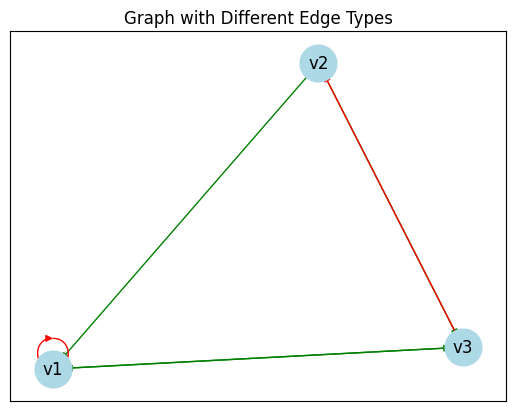

In [ ]:
# Separate Edges Based on the 'sign' Attribute
edges_positive = [(u, v) for u, v, d in G.edges(data=True) if d.get('sign') == {1}]
edges_negative = [(u, v) for u, v, d in G.edges(data=True) if d.get('sign') == {-1}]

##  Draw nodes and edges
pos = nx.spring_layout(G)  # You can choose a different layout if you prefer
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

# Draw positive edges with standard arrowhead
nx.draw_networkx_edges(G, pos, edgelist=edges_positive, edge_color='green', arrows=True)

# Draw negative edges with T-shaped arrowhead
nx.draw_networkx_edges(G, pos, edgelist=edges_negative, edge_color='red', arrows=True, arrowstyle='-|>')

## Add labels and show the plot
nx.draw_networkx_labels(G, pos)
plt.title("Graph with Different Edge Types")
plt.show()


## State Transition graphs
Prime implicants can be used to derive the state transition graph (STG) of a network. To compute it, use the function primes2stg of the module StateTransitionGraphs. It returns an instance of the NetworkX digraph class.

The second argument to primes2stg is either “synchronous” or “asynchronous” for the fully synchronous or the fully asynchronous transition relation, see e.g. [Klarner2015](https://www.frontiersin.org/articles/10.3389/fbioe.2015.00130/full) for a formal definition.

The nodes of an STG are string representations of states, e.g. “110”, see states, [subspaces and paths](https://pyboolnet.readthedocs.io/en/master/manual.html#states-subspaces-paths). You may use state2str to convert a state dictionary into a state string. They are vectors of activities, sorted by component names:

In [67]:
update = "synchronous"
stg = STGs.primes2stg(primes, update)
list(stg.nodes())[0]

'111'

You may use NetworkX functions on stg, for example [networkx.has_path:](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.has_path.html#networkx.algorithms.shortest_paths.generic.has_path)

In [68]:
nx.has_path(stg, "100", "111")

True

## Attractor detection
Attractors capture the long-term activities of the components of Boolean networks. Two different types of attractors are possible: either all activities stabilize at some values and the network enters a steady state or at least one component shows sustained oscillations and the network enters a cyclic attractor. Formally, attractors are defined as the inclusion-wise minimal trap sets of a given STG (state transition graph) which is equivalent to the so-called terminal SCCs (strongly connected components)  of the state transition graph. One approach to computing the attractors is to use Tarjan’s algorithm for computing the SCCs of a directed graph, see [Tarjan1972](https://pyboolnet.readthedocs.io/en/master/bibliography.html#tarjan1972) and then to select those SCCs that are terminal, i.e., those for which there is no path to another SCC. This approach is implemented in the function `compute_attractors_tarjan.

In [78]:
attractors = AD.compute_attractors_tarjan(stg)
#for A in attractors:
#  print([STGs.state2str(x) for x in A])
x = attractors[1]
x[0]
#STGs.state2str(x)


{'000', '001', '010', '101', '111'}

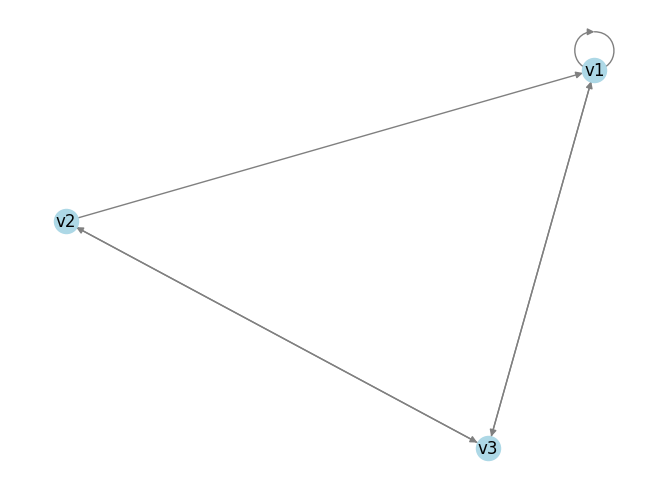

In [ ]:
## plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [ ]:
#! ls -l
#! pwd
!jupyter nbconvert /content/drive/MyDrive/Colab Notebooks/test_pyboolnet.ipynb --to html

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab' matched no files
[NbConvertApp] WARNING | pattern 'Notebooks/test_pyboolnet.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any q

In [ ]:
import os

for file in os.listdir():
    if os.path.isfile(file):
        print(f"File: {file}, Path: {os.path.abspath(file)}")